2-element Vector{Int64}:
 10
 65

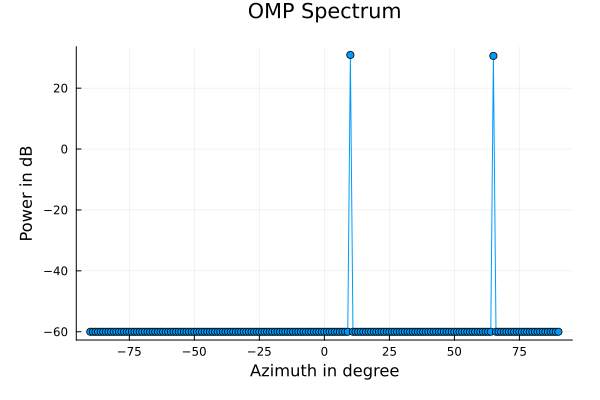

In [12]:
using ArraySignalProcessing
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])
Δ = 1

# test signal generation
Rss = I(2)
Θ = deg2rad.([10, 65])
d = length(Θ)
N = 2000
SNR = 5
X = unconditional_signals(pa, Rss, N, SNR, Θ, fc)

θgrid = Vector(-90:90)
A = steer(pa, deg2rad.(θgrid), fc)
spectrum = omp(X, A, d)
Θest = θgrid[spectrum .> 0]
display(Θest)

using Plots
import Measures

# clip OMP spectrum to show the zero-entries
spectrum_clipped = max.(spectrum, 1e-6)

p1 = plot(θgrid, 10*log10.((spectrum_clipped)),marker=:dot, legend=false)
plot!(title="OMP Spectrum", margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")

2-element CuArray{Int64, 1, CUDA.DeviceMemory}:
 10
 65

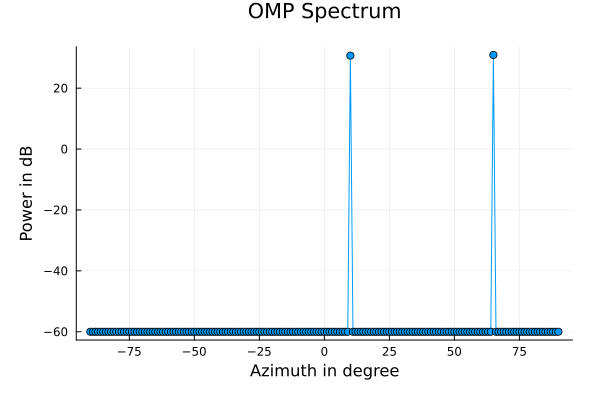

In [13]:
using CUDA
using ArraySignalProcessing
using LinearAlgebra

fc = 150e6

# Spacing:  1m is λ/2 for 150MHz 
# Oriented along yaxis to match Matlab behavior
pa = IsotropicArray([0 0 0 0;
                    -1.5 -0.5 0.5 1.5])
Δ = 1

# test signal generation
Rss = I(2)
Θ = deg2rad.([10, 65])
d = length(Θ)
N = 2000
SNR = 5
X = unconditional_signals(pa, Rss, N, SNR, Θ, fc)

# make cuda based PhasedArray
pa = IsotropicArray(cu([0 0 0 0;
                    -1.5 -0.5 0.5 1.5]))

θgrid = cu(collect(Vector(-90:90)))
A = steer(pa, deg2rad.(θgrid), fc)
spectrum = omp(cu(X), A, d)
Θest = θgrid[spectrum .> 0]
display(Θest)

using Plots
import Measures

# clip OMP spectrum to show the zero-entries
spectrum_clipped = max.(spectrum, 1e-6)

p1 = plot(Array(θgrid), Array(10*log10.((spectrum_clipped))),marker=:dot, legend=false)
plot!(title="OMP Spectrum", margin=5*Measures.mm)
xlabel!("Azimuth in degree")
ylabel!("Power in dB")